In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
white_potato_information = pd.read_csv('datos_encuesta_2017/white_potato_information.csv')

In [3]:
base = ["P707", "P708and712", "P709", "P710"]

In [4]:
variables = [{"name": "P707", "len": 8}, {"name": "P708and712", "len": 13}, {"name": "P709", "len": 9}, {"name": "P710", "len": 10}]
newVariables = {}
for variable in variables:
    name = variable["name"]
    lenght = variable["len"]
    array = []
    for i in range(1, lenght + 1):
        array = np.append(array, name + "_%s" % i)
    newVariables[name] = array

In [5]:
newVariables

{'P707': array(['P707_1', 'P707_2', 'P707_3', 'P707_4', 'P707_5', 'P707_6',
        'P707_7', 'P707_8'], dtype='<U32'),
 'P708and712': array(['P708and712_1', 'P708and712_2', 'P708and712_3', 'P708and712_4',
        'P708and712_5', 'P708and712_6', 'P708and712_7', 'P708and712_8',
        'P708and712_9', 'P708and712_10', 'P708and712_11', 'P708and712_12',
        'P708and712_13'], dtype='<U32'),
 'P709': array(['P709_1', 'P709_2', 'P709_3', 'P709_4', 'P709_5', 'P709_6',
        'P709_7', 'P709_8', 'P709_9'], dtype='<U32'),
 'P710': array(['P710_1', 'P710_2', 'P710_3', 'P710_4', 'P710_5', 'P710_6',
        'P710_7', 'P710_8', 'P710_9', 'P710_10'], dtype='<U32')}

In [6]:
newNumberVariables = {}
for name in base:
    selected = newVariables[name]
    number_array = white_potato_information[selected].sum(axis=1)
    newNumberVariables[name] = number_array

In [7]:
# newNumberVariables

In [8]:
# Quantity of information values suf []_qty
for name in base:
    white_potato_information[name + "_qty"] = newNumberVariables[name]

In [9]:
# Qty and percentage
for name in base:
    column_qty = name + "_qty"
    column_variable = white_potato_information[column_qty]
    totalLen = len(column_variable)
    print("======" + name + "======")
    print("Qty\n", column_variable.value_counts(), "\nPercentage\n", column_variable.value_counts() / totalLen * 100)
    print()

======P707======
Qty
 2    1022
1     785
0     658
3     404
4     200
5      89
6      50
7      36
8       1
Name: P707_qty, dtype: int64 
Percentage
 2    31.494607
1    24.191063
0    20.277350
3    12.449923
4     6.163328
5     2.742681
6     1.540832
7     1.109399
8     0.030817
Name: P707_qty, dtype: float64

======P708and712======
Qty
 1    1925
0     685
2     488
3     129
4      16
5       2
Name: P708and712_qty, dtype: int64 
Percentage
 1    59.322034
0    21.109399
2    15.038521
3     3.975347
4     0.493066
5     0.061633
Name: P708and712_qty, dtype: float64

======P709======
Qty
 1    2144
0     723
2     278
3      86
4       9
5       5
Name: P709_qty, dtype: int64 
Percentage
 1    66.070878
0    22.280431
2     8.567026
3     2.650231
4     0.277350
5     0.154083
Name: P709_qty, dtype: float64

======P710======
Qty
 3    957
2    900
4    484
1    477
5    230
6     95
7     57
8     32
9     13
Name: P710_qty, dtype: int64 
Percentage
 3    29.491525
2    27.7

In [89]:
questions = {"P707": {"es": "¿Qué información agropecuaria se utilizó?", "en": "What agricultural information was used?"}, \
             "P708and712": {"es": "¿Qué institución o persona le brindó la información?", "en": "What institution or person provides you with the information?"}, \
             "P709": {"es": "¿A través de qué medio de comunicación tuvo acceso a la información?", "en": "Through which communication medium did you access the information?"}, \
             "P710": {"es": "¿Qué información agropecuaria necesita para desarrollar su actividad?", "en": "What agricultural information do you need to carry out your activity?"}}
newNameColumns = {"es": { \
                         "P707_1": "1. Precio de venta", \
                         "P707_2": "2. Cantidad producida", \
                         "P707_3": "3. Demanda de productos agropecuarios", \
                         "P707_4": "4. Cantidad comercializada", \
                         "P707_5": "5. Información agroclimática", \
                         "P707_6": "6. Precio de insumos agropecuarios", \
                         "P707_7": "7. Técnica de manejo de cultivos y crianza", \
                         "P707_8": "8. Otra información", \
                         "P707_NAN": "9. Ninguna información", \
                         "P708and712_1": "1. Ministerio de Agricultura y Riego", \
                         "P708and712_2": "2. Agencia agraria", \
                         "P708and712_3": "3. Instituto Nacional de Innovación Agraria (INIA)", \
                         "P708and712_4": "4. Servicio Nacional de Sanidad Agraria (SENASA)", \
                         "P708and712_5": "5. Instituto Nacional de Defensa Civil (INDECI)", \
                         "P708and712_6": "6. Servicio Nacional de Meteorología e Hidrología (SENAMHI)", \
                         "P708and712_7": "7. Gobierno Regional", \
                         "P708and712_8": "8. Gobierno Local", \
                         "P708and712_9": "9. Organismo No Gubernamental (ONG)", \
                         "P708and712_10": "10. Empresa Privada", \
                         "P708and712_11": "11. Asociación de productores/as", \
                         "P708and712_12": "12. Comerciante, productor/a, amigo/a", \
                         "P708and712_13": "13. Otra persona o institución", \
                         "P708and712_NAN": "14. Ninguna persona o institución", \
                         "P709_1": "1. Radio", \
                         "P709_2": "2. Televisión", \
                         "P709_3": "3. Telephone", \
                         "P709_4": "4. Diarios", \
                         "P709_5": "5. Folletos", \
                         "P709_6": "6. Internet", \
                         "P709_7": "7. Talleres", \
                         "P709_8": "8. Comunicación verbal", \
                         "P709_9": "9. Otro medio", \
                         "P709_NAN": "10. Ningún medio", \
                         "P710_1": "1. Información agroclimática", \
                         "P710_2": "2. Manejo de enfermedades y plagas", \
                         "P710_3": "3. Precio de insumos agropecuarios", \
                         "P710_4": "4. Precio de venta (chacra, mayorista, minorista)", \
                         "P710_5": "5. Técnica de manejo de cultivos y crianza", \
                         "P710_6": "6. Técnica de manejo de semilla", \
                         "P710_7": "7. Uso de abonos y fertilizantes", \
                         "P710_8": "8. Técnicas y sistema de riego", \
                         "P710_9": "9. Análisis de suelo", \
                         "P710_10": "10. Otro", \
                         "P710_NAN": "11. Ninguno" \
                        }, \
                  "en": { \
                      "P707_1": "1. Sale price", \
                      "P707_2": "2. Quantity produced", \
                      "P707_3": "3. Demand for agricultural products", \
                      "P707_4": "4. Quantity marketed", \
                      "P707_5": "5. Agroclimatic information", \
                      "P707_6": "6. Price of agricultural inputs", \
                      "P707_7": "7. Crop management and breeding technique", \
                      "P707_8": "8. Other information", \
                      "P707_NAN": "9. No information", \
                      "P708and712_1": "1. Ministry of Agriculture and Irrigation", \
                      "P708and712_2": "2. Agricultural agency", \
                      "P708and712_3": "3. National Institute of Agrarian Innovation (INIA)", \
                      "P708and712_4": "4. National Service of Agrarian Health (SENASA)", \
                      "P708and712_5": "5. National Institute of Civil Defense (INDECI)", \
                      "P708and712_6": "6. National Service of Meteorology and Hydrology (SENAMHI)", \
                      "P708and712_7": "7. Regional Government", \
                      "P708and712_8": "8. Local Government", \
                      "P708and712_9": "9. Non-Governmental Organization (NGO)", \
                      "P708and712_10": "10. Private Company", \
                      "P708and712_11": "11. Association of producers", \
                      "P708and712_12": "12. Trader, producer, friend", \
                      "P708and712_13": "13. Another person or institution", \
                      "P708and712_NAN": "14. No person or institution", \
                      "P709_1": "1. Radio", \
                      "P709_2": "2. Television", \
                      "P709_3": "3. Telephone", \
                      "P709_4": "4. Diaries", \
                      "P709_5": "5. Brochures", \
                      "P709_6": "6. Internet", \
                      "P709_7": "7. Workshops", \
                      "P709_8": "8. Verbal communication", \
                      "P709_9": "9. Another means", \
                      "P709_NAN": "10. No media", \
                      "P710_1": "1. Agroclimatic information", \
                      "P710_2": "2. Management of diseases and pests", \
                      "P710_3": "3. Price of agricultural inputs", \
                      "P710_4": "4. Sale price (farm, wholesaler, retailer)", \
                      "P710_5": "5. Crop management and breeding technique", \
                      "P710_6": "6. Seed management technique", \
                      "P710_7": "7. Use of fertilizers and fertilizers", \
                      "P710_8": "8. Irrigation techniques and system", \
                      "P710_9": "9. Soil analysis", \
                      "P710_10": "10. Other", \
                      "P710_NAN": "11. None" \
                     }
            }

In [63]:
# newNameColumns[lang]

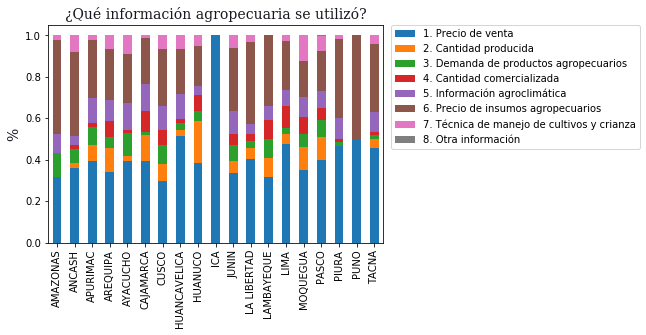

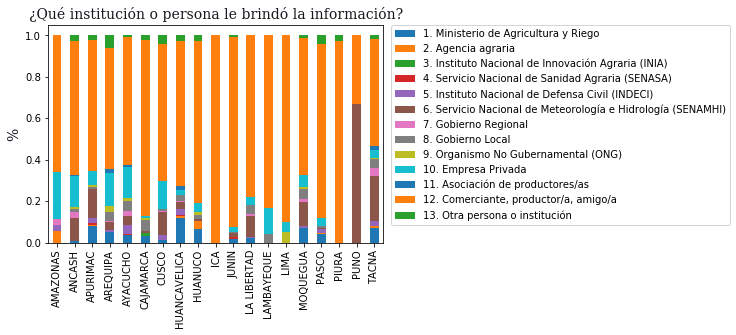

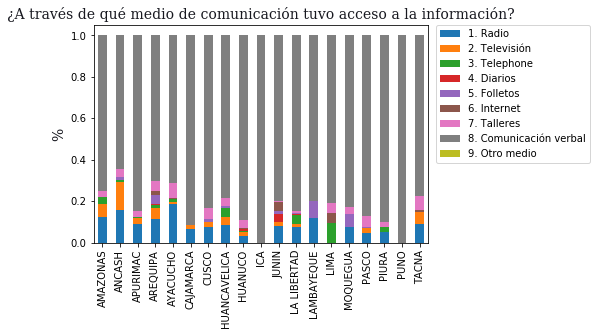

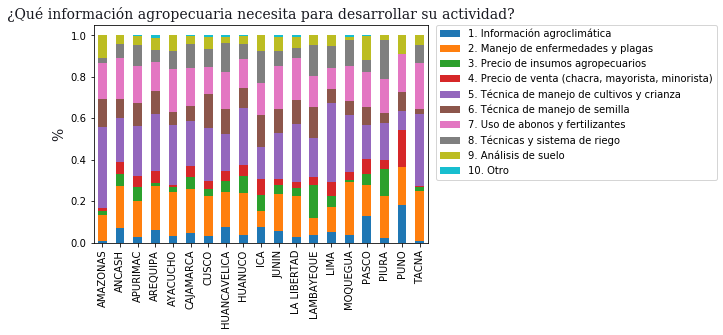

In [13]:
font = {'family': 'serif',
        'color':  '#181920',
        'weight': 'normal',
        'size': 14,
        }
lang = "es"
df_newcolumns = white_potato_information.rename(columns=newNameColumns[lang])
for name in base:
    columns = []
    for name_ in newVariables[name]:
        columns = np.append(columns, newNameColumns[lang][name_])
    df = df_newcolumns.groupby(["NOMBREDD"])[columns].sum()
    df_percentage = df.div(df.sum(axis=1), axis=0)
    counts = df_percentage.reset_index()
    counts.plot(x="NOMBREDD", kind='bar', stacked=True)
    plt.title(questions[name][lang], fontdict=font)
    plt.xlabel("", fontdict=font)
    plt.ylabel("%", fontdict=font)
    plt.legend(bbox_to_anchor=(1.02, 0.905, 1., .102), loc='upper left', ncol=1, borderaxespad=0.1)
    plt.show()

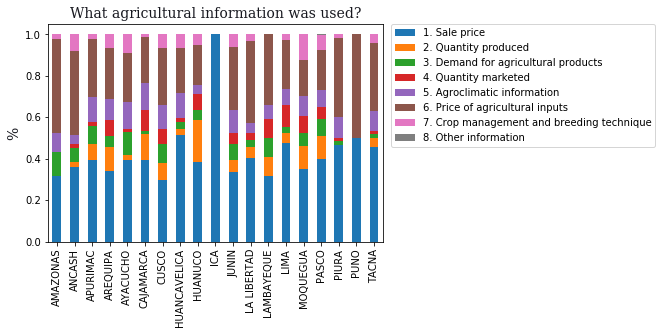

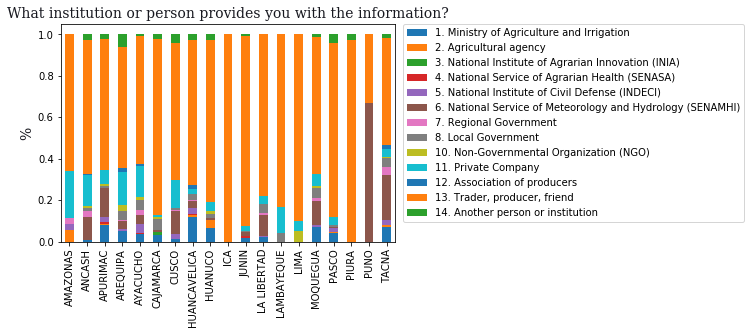

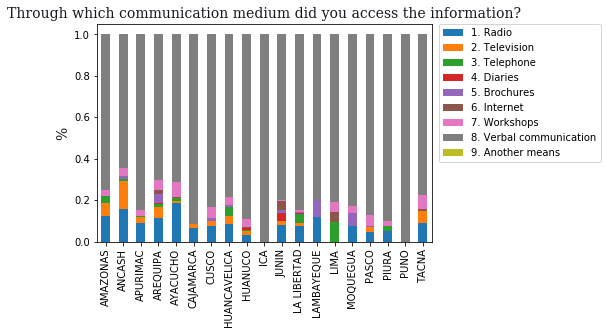

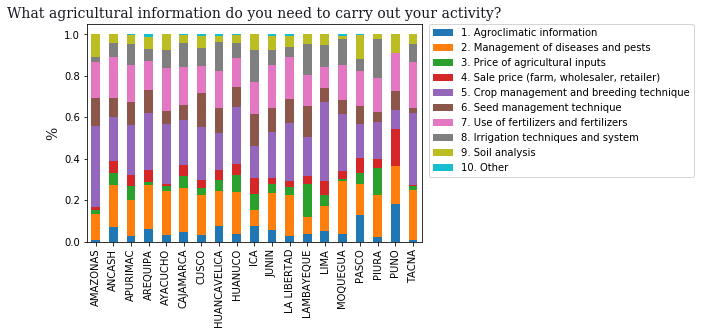

In [36]:
font = {'family': 'serif',
        'color':  '#181920',
        'weight': 'normal',
        'size': 14,
        }
lang = "en"
df_newcolumns = white_potato_information.rename(columns=newNameColumns[lang])
for name in base:
    columns = []
    for name_ in newVariables[name]:
        columns = np.append(columns, newNameColumns[lang][name_])
    df = df_newcolumns.groupby(["NOMBREDD"])[columns].sum()
    df_percentage = df.div(df.sum(axis=1), axis=0)
    counts = df_percentage.reset_index()
    counts.plot(x="NOMBREDD", kind='bar', stacked=True)
    plt.title(questions[name][lang], fontdict=font)
    plt.xlabel("", fontdict=font)
    plt.ylabel("%", fontdict=font)
    plt.legend(bbox_to_anchor=(1.02, 0.905, 1., .102), loc='upper left', ncol=1, borderaxespad=0.1)
    plt.show()

In [15]:
white_potato_information.columns

Index(['Unnamed: 0', 'P707_1', 'P707_2', 'P707_3', 'P707_4', 'P707_5',
       'P707_6', 'P707_7', 'P707_8', 'P708and712_1', 'P708and712_2',
       'P708and712_3', 'P708and712_4', 'P708and712_5', 'P708and712_6',
       'P708and712_7', 'P708and712_8', 'P708and712_9', 'P708and712_10',
       'P708and712_11', 'P708and712_12', 'P708and712_13', 'P709_1', 'P709_2',
       'P709_3', 'P709_4', 'P709_5', 'P709_6', 'P709_7', 'P709_8', 'P709_9',
       'P710_1', 'P710_2', 'P710_3', 'P710_4', 'P710_5', 'P710_6', 'P710_7',
       'P710_8', 'P710_9', 'P710_10', 'ANIO', 'CCDD', 'NOMBREDD', 'CCPP',
       'NOMBREPV', 'CCDI', 'NOMBREDI', 'CONGLOMERADO', 'NSELUA', 'UA',
       'ESTRATO', 'RESFIN', 'REGION', 'DOMINIO', 'FACTOR', 'CODIGO',
       'P707_qty', 'P708and712_qty', 'P709_qty', 'P710_qty'],
      dtype='object')

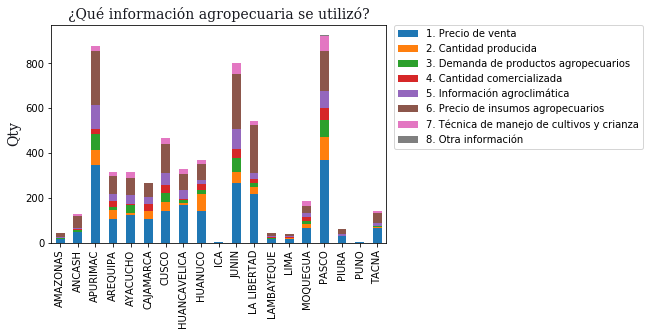

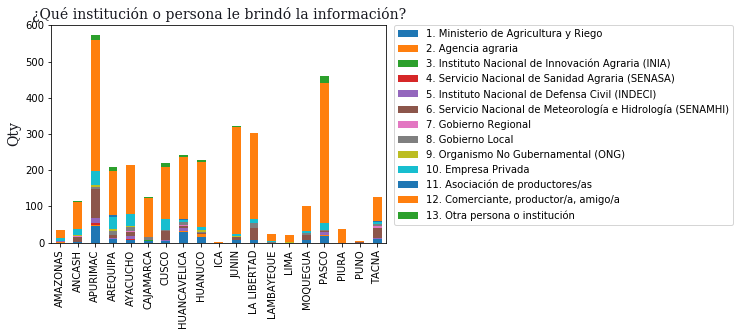

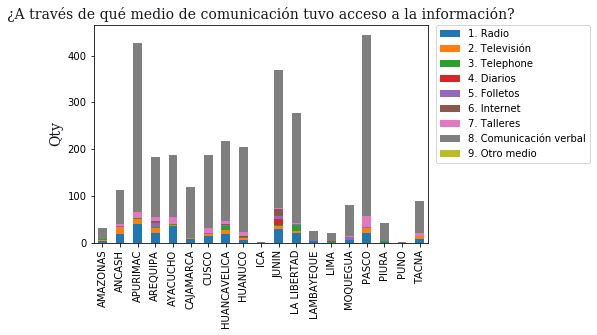

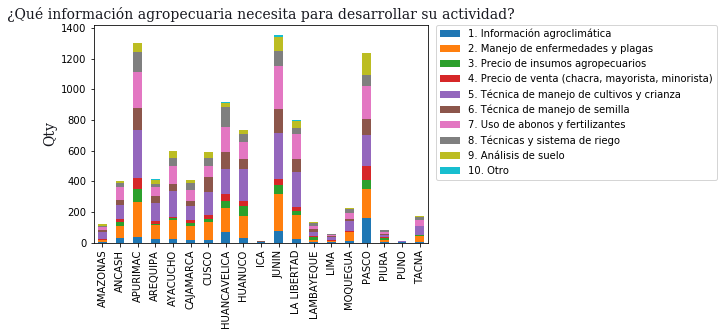

In [19]:
font = {'family': 'serif',
        'color':  '#181920',
        'weight': 'normal',
        'size': 14,
        }
lang = "es"
df_newcolumns = white_potato_information.rename(columns=newNameColumns[lang])
for name in base:
    columns = []
    for name_ in newVariables[name]:
        columns = np.append(columns, newNameColumns[lang][name_])
    df = df_newcolumns.groupby(["NOMBREDD"])[columns].sum()
    counts = df.reset_index()
    counts.plot(x="NOMBREDD", kind='bar', stacked=True)
    plt.title(questions[name][lang], fontdict=font)
    plt.xlabel("", fontdict=font)
    plt.ylabel("Qty", fontdict=font)
    plt.legend(bbox_to_anchor=(1.02, 0.905, 1., .102), loc='upper left', ncol=1, borderaxespad=0.1)
    plt.show()

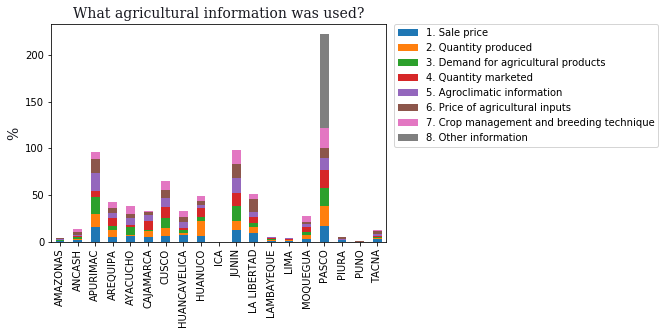

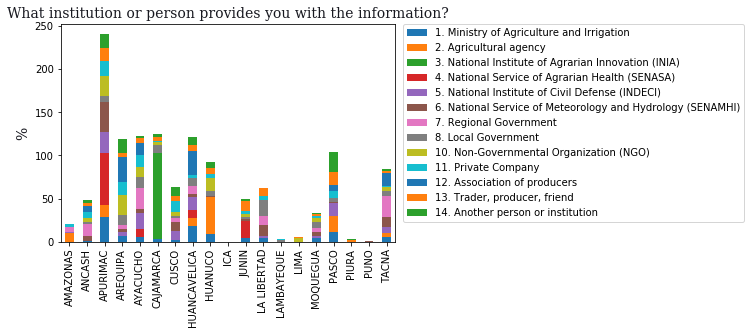

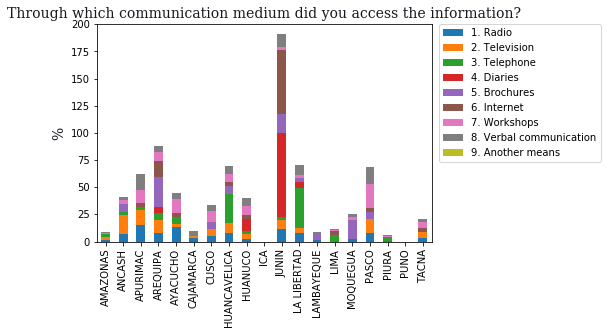

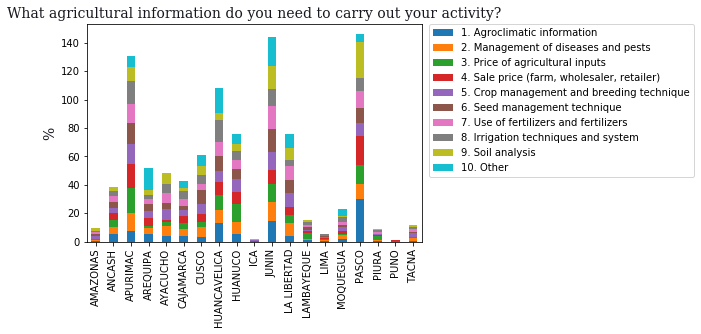

In [16]:
font = {'family': 'serif',
        'color':  '#181920',
        'weight': 'normal',
        'size': 14,
        }
lang = "en"
df_newcolumns = white_potato_information.rename(columns=newNameColumns[lang])
for name in base:
    columns = []
    for name_ in newVariables[name]:
        columns = np.append(columns, newNameColumns[lang][name_])
    df = df_newcolumns.groupby(["NOMBREDD"])[columns].sum()
    df_percentage = df.div(df.sum(axis=0), axis=1) * 100
    counts = df_percentage.reset_index()
    counts.plot(x="NOMBREDD", kind='bar', stacked=True)
    plt.title(questions[name][lang], fontdict=font)
    plt.xlabel("", fontdict=font)
    plt.ylabel("%", fontdict=font)
    plt.legend(bbox_to_anchor=(1.02, 0.905, 1., .102), loc='upper left', ncol=1, borderaxespad=0.1)
    plt.show()

# Creating NAN columns

In [83]:
font = {'family': 'serif',
        'color':  '#181920',
        'weight': 'normal',
        'size': 14,
        }
lang = "en"
df_newcolumns = white_potato_information.rename(columns=newNameColumns[lang])
for name in base:
    columns = []
    for name_ in newVariables[name]:
        columns = np.append(columns, newNameColumns[lang][name_])
    newVariables[name] = np.append(newVariables[name], "%s_NAN" % name)
    white_potato_information["%s_NAN" % name] = (df_newcolumns[columns].sum(axis=1) == 0)*1

In [106]:
# newVariables

# Ploting all variables

In [98]:
import seaborn as sns

In [111]:
pal = {'P707': ["#5cc9f5", "#e74c3c", "#2ecc71", "#ce6b94", "#3366ff", "#fee1a4", "#aad73e", "#c2c4cd",  "#001b4f"],
 'P708and712': ["#5cc9f5", "#e74c3c", "#2ecc71", "#ce6b94", "#3366ff", "#fee1a4", "#aad73e", "#5a86a6", "#265ad2", "#265ad2", "#34495e", "#582584", "#c2c4cd", "#001b4f"],
 'P709': ["#5cc9f5", "#e74c3c", "#2ecc71", "#ce6b94", "#3366ff", "#fee1a4", "#aad73e", "#6c549a", "#c2c4cd", "#001b4f"],
 'P710': ["#5cc9f5", "#e74c3c", "#2ecc71", "#ce6b94", "#3366ff", "#fee1a4", "#aad73e", "#6c549a",  "#f97a7a", "#c2c4cd", "#001b4f"]}

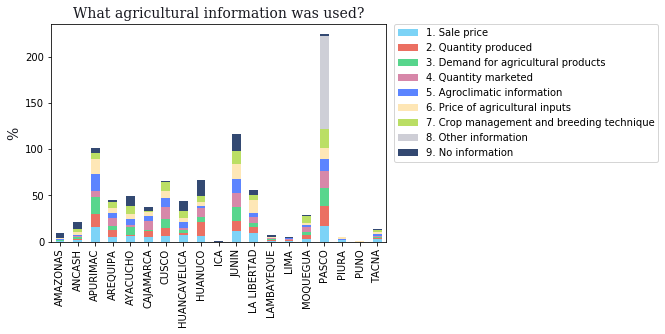

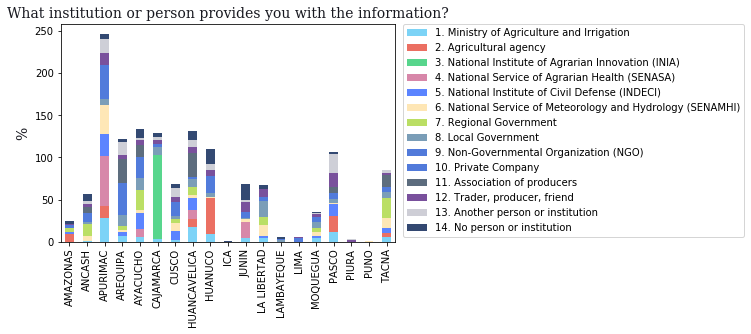

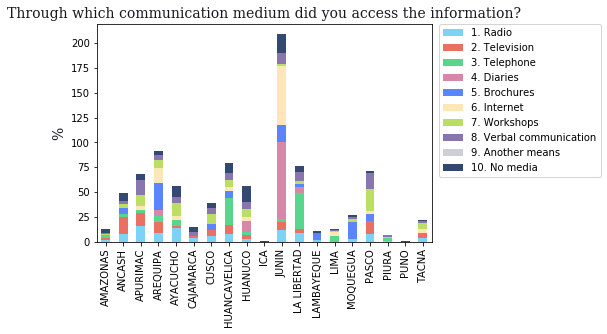

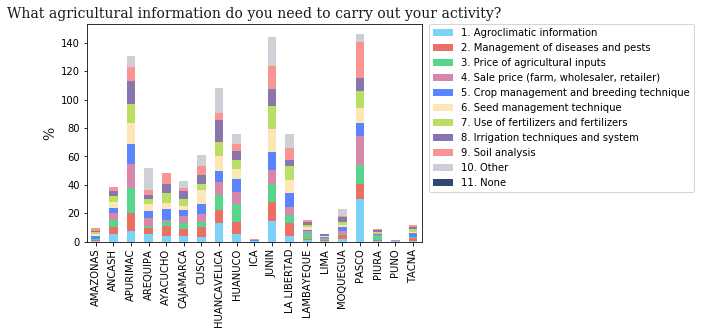

In [112]:
font = {'family': 'serif',
        'color':  '#181920',
        'weight': 'normal',
        'size': 14,
        }
lang = "en"
df_newcolumns = white_potato_information.rename(columns=newNameColumns[lang])
for name in base:
    columns = []
    for name_ in newVariables[name]:
        columns = np.append(columns, newNameColumns[lang][name_])
    df = df_newcolumns.groupby(["NOMBREDD"])[columns].sum()
    df_percentage = df.div(df.sum(axis=0), axis=1) * 100
    counts = df_percentage.reset_index()
    p = pal[name]
    counts.plot(x="NOMBREDD", kind='bar', colors=p, stacked=True, alpha=0.8 )
    plt.title(questions[name][lang], fontdict=font)
    plt.xlabel("", fontdict=font)
    plt.ylabel("%", fontdict=font)
    plt.legend(bbox_to_anchor=(1.02, 0.905, 1., .102), loc='upper left', ncol=1, borderaxespad=0.1)
    plt.show()

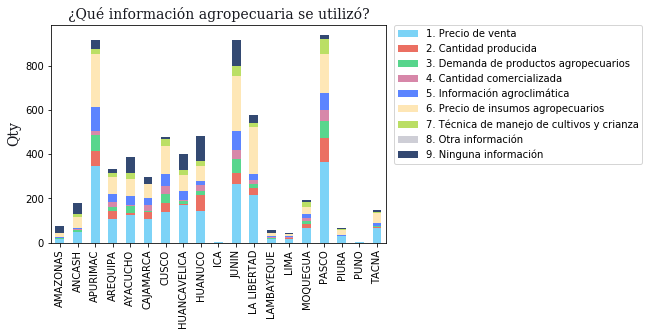

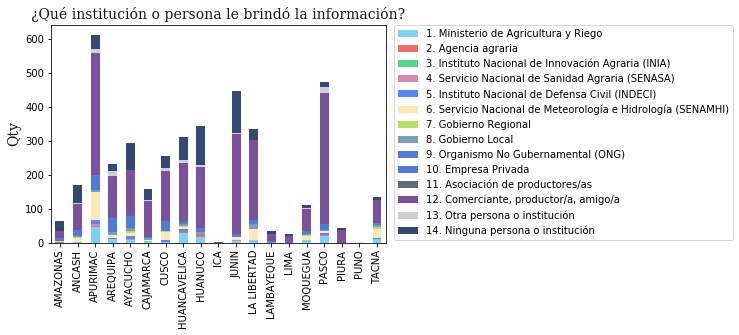

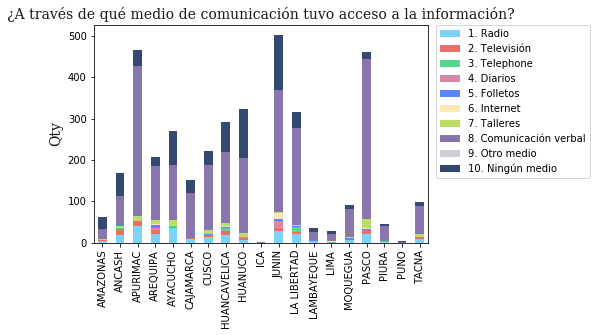

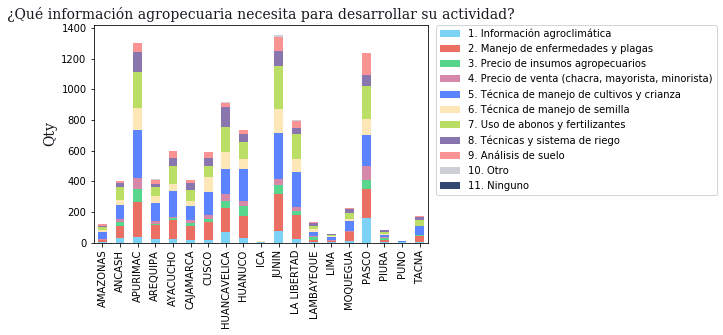

In [113]:
font = {'family': 'serif',
        'color':  '#181920',
        'weight': 'normal',
        'size': 14,
        }
lang = "es"
df_newcolumns = white_potato_information.rename(columns=newNameColumns[lang])
for name in base:
    columns = []
    for name_ in newVariables[name]:
        columns = np.append(columns, newNameColumns[lang][name_])
    df = df_newcolumns.groupby(["NOMBREDD"])[columns].sum()
    counts = df.reset_index()
    p = pal[name]
    counts.plot(x="NOMBREDD", kind='bar', colors=p, stacked=True, alpha=0.8 )
    plt.title(questions[name][lang], fontdict=font)
    plt.xlabel("", fontdict=font)
    plt.ylabel("Qty", fontdict=font)
    plt.legend(bbox_to_anchor=(1.02, 0.905, 1., .102), loc='upper left', ncol=1, borderaxespad=0.1)
    plt.show()

In [ ]:
# NIVEL EDUCATIVO
# COEF de INFORMACION